<span style="color:blue"> For this part we will do everything manually only using numpy array and then translate the idea to pytorch ... We will start with our prediction and then compute gradient and then the loss and finally update the parameter. Please look at the pdf file for better understanding of these code. 


Prediction before training: f(5)=0.000
epoch1: w=1.200, loss= 30.00000000
epoch3: w=1.872, loss= 0.76800019
epoch5: w=1.980, loss= 0.01966083
epoch7: w=1.997, loss= 0.00050331
epoch9: w=1.999, loss= 0.00001288
Prediction after training : f(5) = 9.999


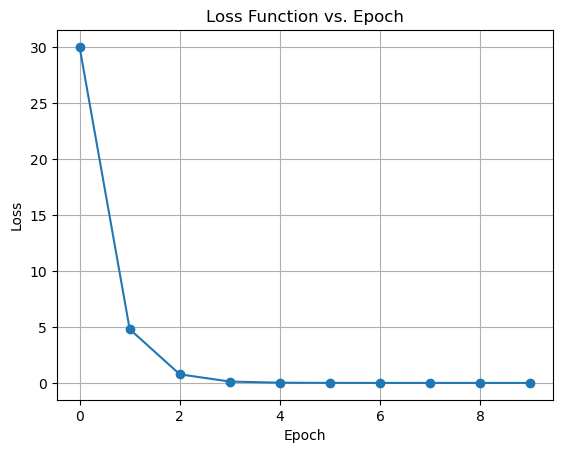

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
# f=w*x
x=np.array([1,2,3,4], dtype=np.float32)
y_actual=np.array([2,4,6,8], dtype=np.float32)

w=0.0

#model prediction
def forward(x): 
    return w*x

#loss =MSE
def loss(y_actual,y_predicted):
    return((y_predicted-y_actual)**2).mean()

#gradient : 
def gradient(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters=10
loss_values=[]
for epoch in range(n_iters):
    #prediction=forward pass 
    y_pred=forward(x)

    #loss
    l=loss(y_actual,y_pred)
    loss_values.append(l.item())
    #gradient
    dw=gradient(x,y_actual,y_pred)

    #update weights
    w-=learning_rate*dw
    
    if epoch %2==0:
        print(f'epoch{epoch+1}: w={w:.3f}, loss= {l:.8f}')

print(f'Prediction after training : f(5) = {forward(5):.3f}')

plt.plot( loss_values, marker='o')
plt.title('Loss Function vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
    

    
    

<span style="color:blue">This method of doing the prediction is analytical.This is the most accurate it can get and the model converses to correct value very quickly. Next, we will replace the gradient function by loss.backward/w.grad module in pytorch by keeping everything else same. 

Prediction before training: f(5)=0.000
epoch1: w=0.300, loss= 30.00000000
epoch2: w=0.555, loss= 21.67499924
epoch3: w=0.772, loss= 15.66018772
epoch4: w=0.956, loss= 11.31448650
epoch5: w=1.113, loss= 8.17471695
epoch6: w=1.246, loss= 5.90623236
epoch7: w=1.359, loss= 4.26725292
epoch8: w=1.455, loss= 3.08308983
epoch9: w=1.537, loss= 2.22753215
epoch10: w=1.606, loss= 1.60939169
epoch11: w=1.665, loss= 1.16278565
epoch12: w=1.716, loss= 0.84011245
epoch13: w=1.758, loss= 0.60698116
epoch14: w=1.794, loss= 0.43854395
epoch15: w=1.825, loss= 0.31684780
epoch16: w=1.851, loss= 0.22892261
epoch17: w=1.874, loss= 0.16539653
epoch18: w=1.893, loss= 0.11949898
epoch19: w=1.909, loss= 0.08633806
epoch20: w=1.922, loss= 0.06237914
epoch21: w=1.934, loss= 0.04506890
epoch22: w=1.944, loss= 0.03256231
epoch23: w=1.952, loss= 0.02352631
epoch24: w=1.960, loss= 0.01699772
epoch25: w=1.966, loss= 0.01228084
epoch26: w=1.971, loss= 0.00887291
epoch27: w=1.975, loss= 0.00641066
epoch28: w=1.979, los

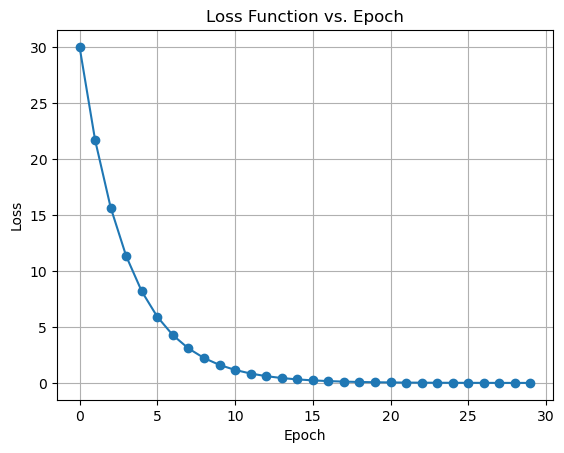

In [34]:
import torch

# f=w*x
x=torch.tensor([1,2,3,4], dtype=torch.float32)
y_actual=torch.tensor([2,4,6,8], dtype=torch.float32)

w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

#model prediction
def forward(x): 
    return w*x

#loss =MSE

def loss(y_actual,y_predicted):
    return((y_predicted-y_actual)**2).mean()

#gradient : 
def gradient(x,y_actual,y_predicted):
    return np.dot(2*x,y_predicted-y_actual).mean()

print(f'Prediction before training: f(5)={forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters=30
loss_values=[]
for epoch in range(n_iters):
    #prediction=forward pass 
    y_pred=forward(x)

    #loss
    l=loss(y_actual,y_pred)
    loss_values.append(l.item())
    #gradient= Backward pass
    l.backward() #dl/dw

    #update weights
    with torch.no_grad():
        w-=learning_rate*w.grad

    #zero gradient
    w.grad.zero_()
    
    if epoch %1==0:
        print(f'epoch{epoch+1}: w={w:.3f}, loss= {l:.8f}')

print(f'Prediction after training : f(5) = {forward(5):.3f}')

    
plt.plot( loss_values, marker='o')
plt.title('Loss Function vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

    
    

<span style="color:blue"> At home, replace the the loss function by pytorch module (loss=nn.MSELoss) and plot the loss function vs epoch plot to see how long it takes to converge to lowest value. We will discuss this in our next meeting. 